# Nhãn hiếm (Rare Label)

## Các nhãn hiếm khi xảy ra

Biến hạng mục là những giá trị được chọn từ một nhóm các hạng mục, còn được gọi là nhãn. Các nhãn khác nhau xuất hiện trong tập dữ liệu với tần suất khác nhau. Một số hạng mục xuất hiện nhiều trong tập dữ liệu, trong khi một số hạng mục khác chỉ xuất hiện trong mộ vài quan sát.

Ví dụ: trong tập dữ liệu có thông tin về những người nộp đơn xin vay vốn có một biến "city", là nơi người nộp đơn sinh sống, các thành phố như 'New York' có thể xuất hiện nhiều trong dữ liệu vì New York có dân số rất lớn, trong khi các thị trấn nhỏ hơn như 'Leavenworth' sẽ chỉ xuất hiện trong một vài trường hợp (dân số < 2000 người), vì dân số ở đó rất nhỏ. Người đi vay có nhiều khả năng sống ở New York hơn do New York có nhiều người sinh sống hơn.

Trên thực tế, các biến hạng mục thường chứa một vài nhãn chủ yếu chiếm phần lớn các quan sát và một lượng lớn các nhãn hiếm khi xuất hiện.


### Nhãn hiếm trong biến hạng mục có phải là vấn đê?

Giá trị hiếm có thể thêm nhiều thông tin hoặc không có gì cả. Ví dụ, hãy xem xét một cuộc họp cổ đông, mỗi người có thể bỏ phiếu tương ứng với số cổ phần của họ. Một trong các cổ đông sở hữu 50% cổ phần và 999 cổ đông còn lại sở hữu 50% cổ phần còn lại. Kết quả của cuộc bỏ phiếu bị ảnh hưởng chủ yếu bởi cổ đông nắm giữ phần lớn cổ phiếu. Các cổ đông còn lại có thể có tác động chung chứ hầu như không có tác động riêng lẻ.

Nhãn được biểu diễn quá mức trong tập dữ liệu có xu hướng chi phối kết quả và những nhãn được biểu diễn ít có thể không có tác động riêng, nhưng có thể có tác động nếu được xem xét chung.

Cụ thể,

- Các giá trị hiếm trong các biến hạng mục có xu hướng gây ra overfitting, đặc biệt là trong các phương pháp cây.

- Một số lượng lớn các nhãn không thường xuất hiện sẽ gây nhiễu, có ít thông tin, do đó dẫn tới overfitting.

- Nhãn hiếm có thể xuất hiện trong tập huấn luyện, nhưng không có trong tập kiểm tra, do đó gây ra overfitting với tập huấn luyện.


-  Nhãn hiếm cũng có thể xuất hiện trong tập kiểm tra và không xuất hiện trong tập huấn luyện. Như vậy, mô hình học máy sẽ không biết đánh giá nó như thế nào.


**Lưu ý:** Đôi khi các giá trị hiếm thực sự quan trọng. Ví dụ, nếu chúng ta xây dựng một mô hình để dự đoán các đơn xin vay bị gian lận mà về bản chất là rất hiếm, thì một giá trị hiếm trong một biến nhất định có thể mang tính dự đoán. Giá trị hiếm này cho chúng ta biết rằng quan sát có thể là một ứng dụng gian lận để không bỏ qua nó. 

## Trong mô phỏng này:

Chúng ta sẽ:

- Học cách xác định nhãn hiếm trong một tập dữ liệu.
- Hiểu được lấy thông tin đáng tin cậy được từ chúng khó thế nào.
- Hiển thị phân phối không đều của nhãn hiếm giữa tập huấn luyện và tập kiểm tra.

Chúng ta sẽ sử dụng tập dữ liệu giá nhà.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

In [7]:
## Yêu cầu 1: load tập dữ liệu giá nhà với các biến đã xác định

# Định nghĩa biến:

# Neighborhood: Vị trí địa lý với giới hạn thành phố Ames
# Exterior1st: Bề ngoài ngôi nhà
# Exterior2nd: Bề ngoài ngôi nhà (nếu có nhiều hơn một vật liệu)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

## VIẾT CODE Ở ĐÂY:
data = pd.read_csv('houseprice.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [9]:
## Yêu cầu 2: nhìn số lượng các nhãn duy nhất khác nhau ở mỗi biến (cardinality)

# có các biến hạng mục đã load
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

## VIẾT CODE Ở ĐÂY:
for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

variable:  Neighborhood  number of labels:  25
variable:  Exterior1st  number of labels:  15
variable:  Exterior2nd  number of labels:  16
total houses:  1460


<details><summary> Gợi ý: </summary>

Sử dụng hàm `unique()`
</details>

Biến 'Neighborhood' hiển thị 25 giá trị khác nhau, 'Exterior1st' hiển thị 15 hạng mục khác nhau, 'Exterior2nd' hiển thị 16 hạng mục khác nhau.

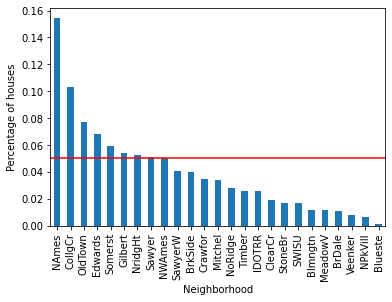

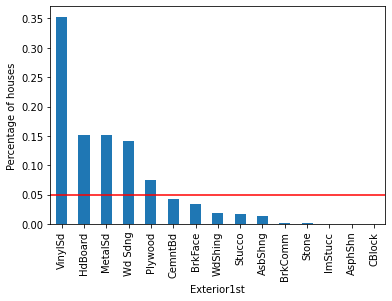

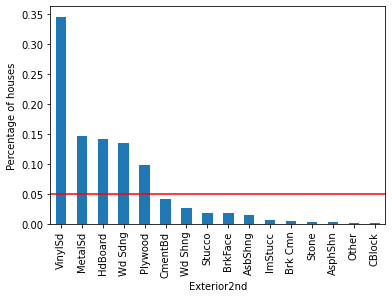

In [10]:
## Yêu cầu 3: vẽ mức độ từng nhãn xuất hiện thường xuyên như thế nào trong tập dữ liệu 

# nói cách khác, tỷ lệ phần trăm các ngôi nhà trong dữ liệu
# với từng nhãn

total_houses = len(data)

# cho từng biến hạng mục
## VIẾT CODE Ở ĐÂY:
for col in cat_cols:

    # đếm số nhà trên mỗi hạng mục
    # và chia cho tổng số nhà

    # hay tỷ lệ phần trăm nhà trên mỗi hạng mục
    ## VIẾT CODE Ở ĐÂY:
    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # vẽ biểu đồ với các tỷ lệ phần trăm trên
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # thêm một dòng ở mức 5% để gắn cờ ngưỡng cho các hạng mục hiếm
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

Với mỗi biến hạng mục, một số nhãn xuất hiện trong hơn 10% số ngôi nhà và nhiều nhãn xuất hiện trong ít hơn 10% hoặc thậm chí 5% số ngôi nhà. Đây là các nhãn không thường xuất hiện hoặc **Giá trị hiếm** và có thể gây ra overfitting.

### Mục tiêu, "SalePrice" liên quan thế nào với các hạng mục này?

Trong các cell sau, chúng ta sẽ tìm hiểu SalePrice trung bình cho mỗi nhóm nhà hiển thị từng hạng mục.

Hãy tiếp tục đọc để hiểu rõ hơn. 

In [11]:
# các hàm sau tính:

# 1) tỷ lệ phần trăm số nhà mỗi hạng mục
# 2) SalePrice trung bình mỗi hạng mục


def calculate_mean_target_per_category(df, var):

    # tổng số nhà
    total_houses = len(df)

    # tỷ lệ phần trăm số nhà mỗi hạng mục
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # thêm SalePrice trung bình
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [13]:
## Yêu cầu 4: sử dụng hàm cho biến 'Neighborhood'
## VIẾT CODE Ở ĐÂY:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


Dataframe trên chứa phần trăm số ngôi nhà hiển thị từng nhãn trong Neighborhood và SalePrice trung bình cho nhóm nhà đó. Nói cách khác, ~ 15% nhà ở NAmes và giá bán trung bình là 145847.

In [14]:
# Giờ hãy tạo một hàm vẽ:
# tần suất hạng mục và SalePrice trung bình.

# Điều này sẽ giúp trực quan hóa mối quan hệ giữa:
# mục tiêu và các nhãn của biến hạng mục

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

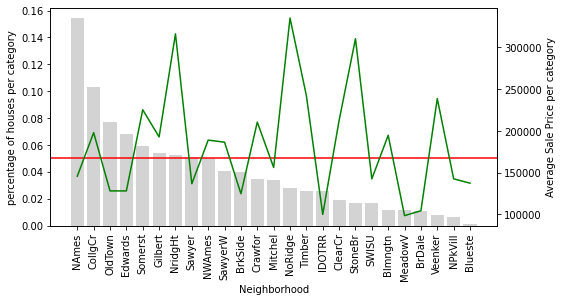

In [15]:
plot_categories(temp_df, 'Neighborhood')

Các ngôi nhà trong 'Neighborhood' của 'NridgHt' bán được giá cao, trong khi những ngôi nhà trong 'Sawyer' có vẻ rẻ hơn.

Các ngôi nhà trong 'Neighborhood' của StoneBr có SalePrice trung bình cao, trên 300k. Tuy nhiên, StoneBr xuất hiện trong ít hơn 5% số ngôi nhà, nói cách khác, chưa tới 5% số ngôi nhà trong tập dữ liệu là ở StoneBr.

Tại sao điều này quan trọng? Vì nếu chúng ta không có nhiều nhà để tìm hiểu thì sẽ đánh giá thấp hoặc đánh giá quá cao tác động của StoneBr đối với SalePrice.

Nói cách khác, chúng ta tự tin thế nào khi cho rằng hầu hết các ngôi nhà trong StoneBr sẽ được bán với giá khoảng 300k khi chỉ có một vài ngôi nhà để tìm hiểu? 

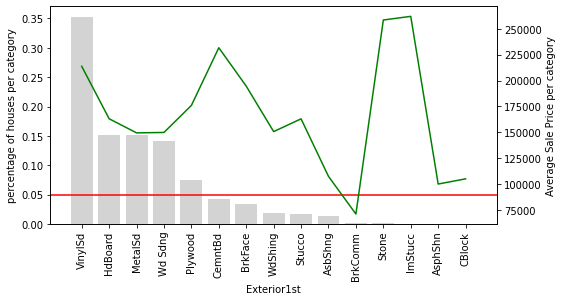

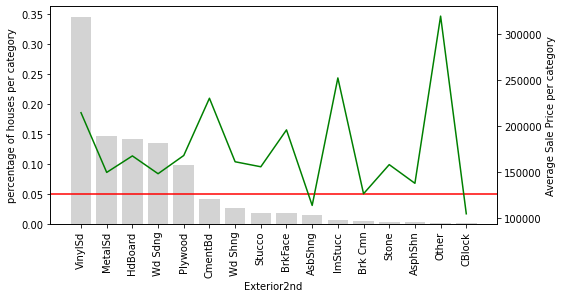

In [17]:
## Yêu cầu 5: hãy vẽ biểu đồ các biến hạng mục còn lại
## VIẾT CODE Ở ĐÂY:
for col in cat_cols:
    
    # chúng ta đã vẽ biểu đồ biến này
    if col !='Neighborhood':
        
        # sử dụng lại hàm đã tạo
        temp_df = calculate_mean_target_per_category(data, col)
        plot_categories(temp_df, col)

Hãy xem xét biến Exterior2nd: Hầu hết các hạng mục trong Exterior2nd thể hiện ít hơn 5% số ngôi nhà. Ngoài ra, "SalePrice" thay đổi rất nhiều trên các hạng mục hiếm đó. Giá trị trung bình của SalePrice tăng và giảm theo các hạng mục không thường xuất hiện. Trên thực tế, nó trông khá nhiễu. Những nhãn hiếm này thực sự có tính dự đoán, hoặc chúng có thể đưa ra nhiễu hơn là thông tin. Và vì các nhãn được biểu diễn ít, chúng ta không thể chắc chắn liệu chúng có tác động thực sự đến giá nhà hay không. Chúng ta có thể ước tính thấp hơn hoặc ước tính quá cao tác động của chúng do có ít thông tin về nhà.

**Lưu ý:** Biểu đồ này sẽ cho nhiều giá trị hơn nếu chúng ta vẽ cả lỗi của SalePrice trung bình. Nó đưa ra ý tưởng về giá trị trung bình của mục tiêu thay đổi như thế nào trong mỗi nhãn. Sao chúng ta không tiếp tục và thêm độ lệch chuẩn vào biểu đồ? 

### Nhãn hiếm: nhóm thành một nhãn mới

Cách phổ biến để làm việc với các giá trị hiếm hoặc các giá trị không thường xuất hiện là nhóm chúng dưới hạng mục bao trùm 'Rare' hoặc 'Other'. Bằng cách này, chúng ta có thể hiểu tác động "tập thể" của các nhãn không thường xuất hiện đối với mục tiêu. Hãy xem bên dưới.

In [18]:
# thay thế tất cả các nhãn xuất hiện ít hơn 5%
# các ngôi nhà theo nhãn 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # trước tiên tính % nhà cho từng hạng mục
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # giờ hãy tạo một dictionary để thay thế nhãn hiếm với
    # string 'rare' nếu chúng xuất hiện ít hơn 5% số nhà 

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # giờ hãy thay thế các hạng mục hiếm
    tmp = df[var].map(grouping_dict)

    return tmp

In [19]:
## Yêu cầu 6: nhóm nhãn hiếm trong 'Neighborhood'
## VIẾT CODE Ở ĐÂY:
data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


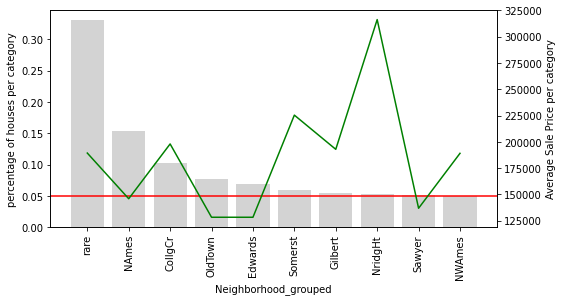

In [20]:
## Yêu cầu 7: vẽ biểu đồ với các hạng mục đã nhóm sử dụng lại hàm đã tạo phía trên 
## VIẾT CODE Ở ĐÂY:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

Bây giờ "Rare" chứa ảnh hưởng tổng thể với tất cả các hạng mục không thường xuất hiện trong SalePrice.

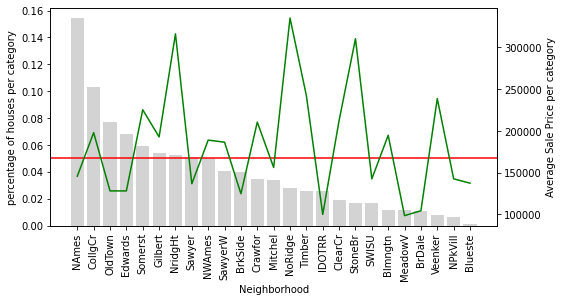

In [21]:
## Yêu cầu 8: vẽ biểu đồ Neighborhood ban đầu để so sánh
## VIẾT CODE Ở ĐÂY
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Chỉ có 9 hạng mục của Neighborhood là tương đối phổ biến trong tập dữ liệu. Những cái còn lại được nhóm thành 'rare', thu được SalePrice trung bình cho tất cả các nhãn không thường xuất hiện.

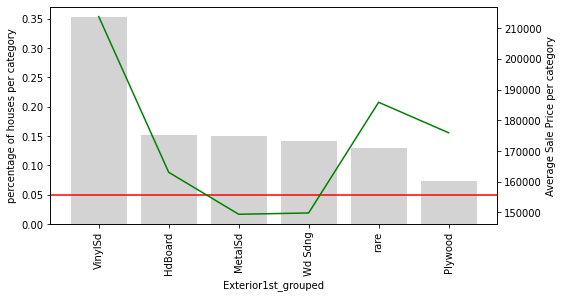

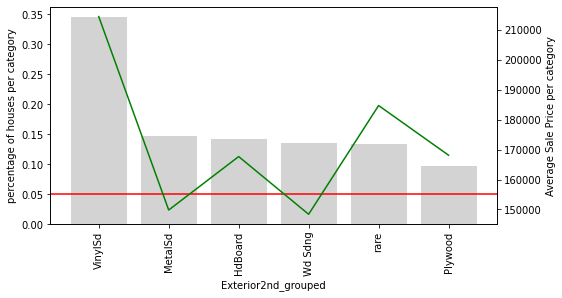

In [22]:
## Yêu cầu 9: hãy nhóm và vẽ biểu đồ các biến hạng mục còn lại
## VIẾT CODE Ở ĐÂY
for col in cat_cols[1:]:
        
    # sử dụng lại hàm đã tạo
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Có một điều thú vị: Trong biến Exterior1st, các ngôi nhà có giá trị hiếm trung bình đều đắt hơn những ngôi nhà còn lại, ngoại trừ những ngôi nhà có VinySd.

Tương tự với Exterior2nd. Các hạng mục hiếm dường như có điểm chung.

**Lưu ý:** Chúng ta cũng muốn có độ lệch chuẩn / IQR cho SalePrice để biết giá nhà thay đổi thế nào với từng hạng mục. 

### Nhãn hiếm dẫn đến phân bố không đồng đều các hạng mục trong tập huấn luyện và kiểm tra

Tương tự như với các biến có độ cardinal cao, nhãn hiếm hoặc nhãn không thường xuất hiện thường chỉ xuất hiện trong tập huấn luyện hoặc chỉ trên tập kiểm tra. Nếu chỉ xuất hiện trong tập huấn luyện, chúng có thể dẫn đến overfitting. Nếu chỉ xuất hiện trong tập kiểm tra, thuật toán học máy sẽ không biết cách xử lý vì chúng không thấy nhãn hiếm trong quá trình huấn luyện. Hãy cùng khám phá thêm điều này. 

In [23]:
## Yêu cầu 10: hãy chia thành tập huấn luyện và tập kiểm tra
## VIẾT CODE Ở ĐÂY
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [24]:
## Yêu cầu 11: hãy tìm các nhãn chỉ xuất hiện trong tập huấn luyện
# sử dụng ví dụ về 'Exterior1st' 

## VIẾT CODE Ở ĐÂY
unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]

print(unique_to_train_set)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']


Có 4 hạng mục xuất hiện trong tập huấn luyện và không xuất hiện trong tập kiểm tra.

In [25]:
## Yêu cầu 12: Hãy tìm các nhãn chỉ xuất hiện trong tập kiểm tra
# lại sử dụng ví dụ về 'Exterior1st'

## VIẾT CODE Ở ĐÂY
unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]

print(unique_to_test_set)

['AsphShn']


Trong trường hợp này, chỉ có 1 giá trị hiếm xuất hiện trong tập kiểm tra. 